In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv(r"C:\Users\len\Downloads\archive\Social_Network_Ads.csv")

In [9]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [10]:
df["Gender"].replace({"Male":1,"Female":0},inplace=True)

C:\Users\len\AppData\Local\Temp\ipykernel_9876\1008825786.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Male":1,"Female":0},inplace=True)
C:\Users\len\AppData\Local\Temp\ipykernel_9876\1008825786.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replace({"

In [11]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [12]:
df=df.drop(columns="User ID")

In [13]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
x=df[['Gender','Age','EstimatedSalary']]
y=df['Purchased']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
x_train

,Gender,Age,EstimatedSalary
250,0,44,39000
63,1,32,120000
312,0,38,50000
159,0,32,135000
283,0,52,21000
...,...,...,...
323,0,48,30000
192,1,29,43000
117,1,36,52000
47,0,27,54000


In [19]:
y_train

250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64

model=LogisticRegression()
model.fit(x_train,y_train)

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\len\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred=model.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

<Axes: >

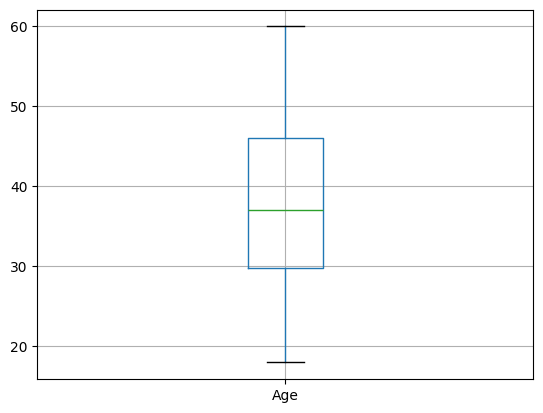

In [23]:
col=['Age']
df.boxplot(col)

In [24]:
model.score(x_train,y_train)

0.8233333333333334

In [25]:
model.score(x_test,y_test)

0.89

In [26]:
import seaborn as sns

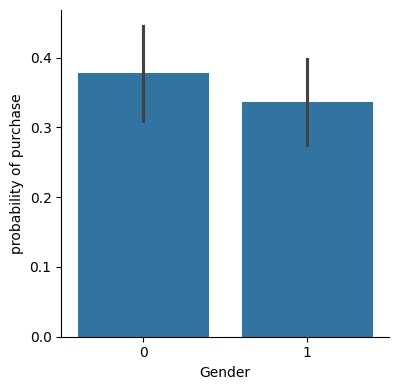

In [27]:
g=sns.catplot(x='Gender',y='Purchased',data=df,kind='bar',height=4)
g.set_ylabels('probability of purchase')
plt.show()

Purchased         0         1
Gender                       
0          0.622549  0.377451
1          0.663265  0.336735


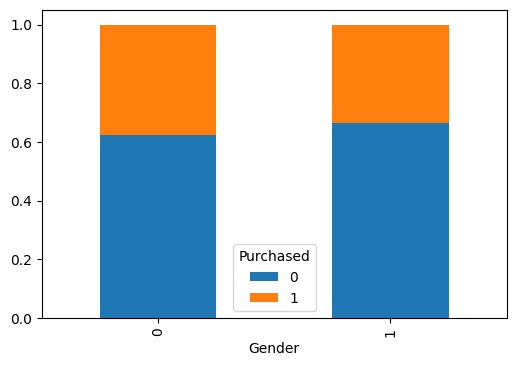

In [28]:
ct=pd.crosstab(df['Gender'],df['Purchased'],normalize="index")
print(ct)
ct.plot.bar(figsize=(6,4),stacked=True)
plt.show()

In [29]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score
cm=confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[64,  4],
       [ 7, 25]], dtype=int64)

In [32]:
tn,fp,tp,fn = confusion_matrix(y_test,y_pred).ravel()

In [33]:
a=accuracy_score(y_test,y_pred)

In [34]:
a

0.89

In [35]:
r=recall_score(y_test,y_pred)

In [36]:
r

0.78125

In [37]:
p=precision_score(y_test,y_pred)

In [38]:
p

0.8620689655172413

In [39]:
corr_matrix=df.corr()

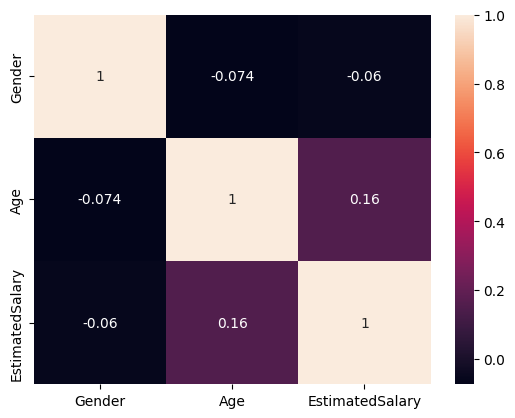

In [41]:
sns.heatmap(x.corr(),annot=True)
plt.show()

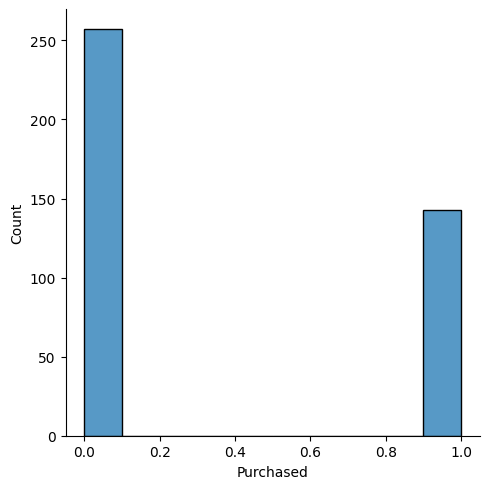

In [42]:
sns.displot(df['Purchased'])
plt.show()